In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import plotly.graph_objects as go
%matplotlib inline 
import pandas
import pandas as pd
from scipy.optimize import curve_fit

In [22]:
def plot_raw_data(file_name, title):
    
    df = pd.read_csv(file_name, sep='\t', header = None)
    temperature = df.iloc[:, 0].astype(float)
    resistivity = df.iloc[:, 1].astype(float) 

    plt.plot(temperature, resistivity, marker='', linestyle='-')

    plt.xlabel('Temperature (K)', fontsize = 10)  
    plt.ylabel('Resistance (Ω)', fontsize = 10)
    plt.title(title, fontsize = 10)  
    plt.grid(False)  
    plt.tight_layout()
    plt.show()

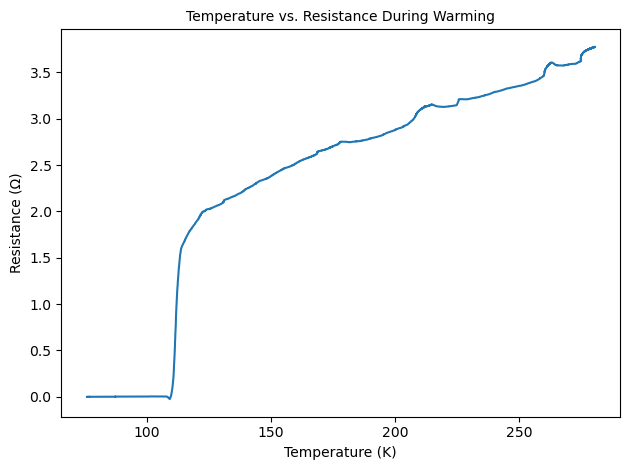

In [23]:
# Plot the raw data
file_name = 'superwarm.txt'
title = 'Temperature vs. Resistance During Warming'
plot_raw_data(file_name, title)

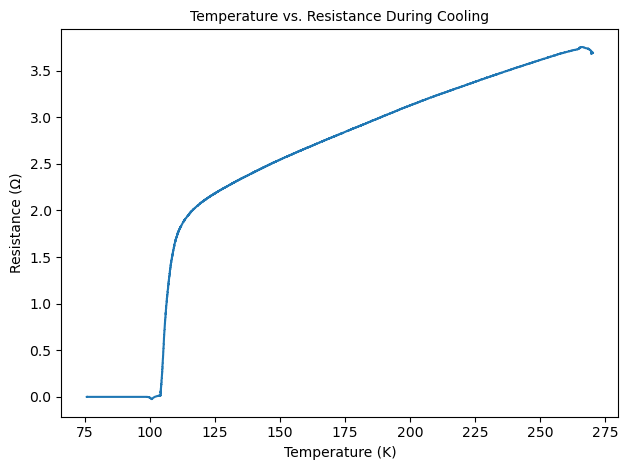

In [24]:
# Plot the raw data
file_name = 'supercond_cool.txt'
title = 'Temperature vs. Resistance During Cooling'
plot_raw_data(file_name, title)

Linear Fit Formula: y = 0.011791x + 0.496843
Intersection Points (x, y):
(112.348781, 1.159195)
(111.499312, 0.628312)
(116.087522, 1.728752)


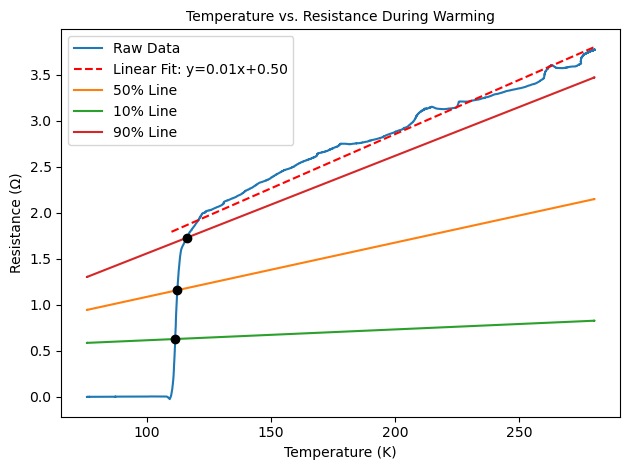

In [20]:
from scipy.stats import linregress

def plot_raw_data_with_fit(file_name, title):
    # Load the data
    df = pd.read_csv(file_name, sep='\t', header=None)
    temperature = df.iloc[:, 0].astype(float)
    resistivity = df.iloc[:, 1].astype(float)
    
     # Filter data within the specified range
    mask = (temperature >= 110) & (temperature <= 300)
    temperature_fit = temperature[mask]
    resistivity_fit = resistivity[mask]

    # Perform linear regression on the filtered data
    slope, intercept, r_value, p_value, std_err = linregress(temperature_fit, resistivity_fit)
    fit_line = slope * temperature_fit + intercept
    
    # Print the exact formula of the linear fit
    print(f"Linear Fit Formula: y = {slope:.6f}x + {intercept:.6f}")
    
    # Plot the raw data
    plt.plot(temperature, resistivity, marker='', linestyle='-', label='Raw Data')

    # Plot the linear fit for the specified range
    plt.plot(temperature_fit, fit_line, color='red', linestyle='--', 
             label=f'Linear Fit: y={slope:.2f}x+{intercept:.2f}')
    
     # Plot additional custom lines if provided
    if custom_lines:
        intersections = []
        for label, formula_function in custom_lines:
            custom_line = formula_function(temperature)
            plt.plot(temperature, custom_line, linestyle='-', label=label)
            
            # Calculate intersection points
            diff = resistivity - custom_line
            sign_changes = np.where(np.diff(np.sign(diff)))[0]  # Find indices where sign changes
            for idx in sign_changes:
                # Linear interpolation to find the exact intersection point
                x_intercept = temperature[idx] - diff[idx] * (temperature[idx + 1] - temperature[idx]) / (diff[idx + 1] - diff[idx])
                y_intercept = formula_function(x_intercept)
                intersections.append((x_intercept, y_intercept))
                plt.scatter(x_intercept, y_intercept, color='black', zorder=5)  # Mark intersection points

        # Print intersection points
        print("Intersection Points (x, y):")
        for point in intersections:
            print(f"({point[0]:.6f}, {point[1]:.6f})")


    # Add labels, title, and legend
    plt.xlabel('Temperature (K)', fontsize=10)
    plt.ylabel('Resistance (Ω)', fontsize=10)
    plt.title(title, fontsize=10)
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()

# Example usage:
# Custom formulas: list of (label, formula_function)
custom_lines = [
    ("50% Line", lambda x: 0.5*0.011791*x + 0.496843),
    ("10% Line", lambda x: 0.1*0.011791*x + 0.496843),
    ("90% Line", lambda x: 0.9*0.011791*x + 0.496843)
]

file_name = 'superwarm.txt'
title = 'Temperature vs. Resistance During Warming'
plot_raw_data_with_fit(file_name, title)

Linear Fit Formula: y = 0.011756x + 0.714039
Intersection Points (x, y):
(106.915160, 1.127161)
(105.482170, 0.621217)
(109.780000, 1.661817)


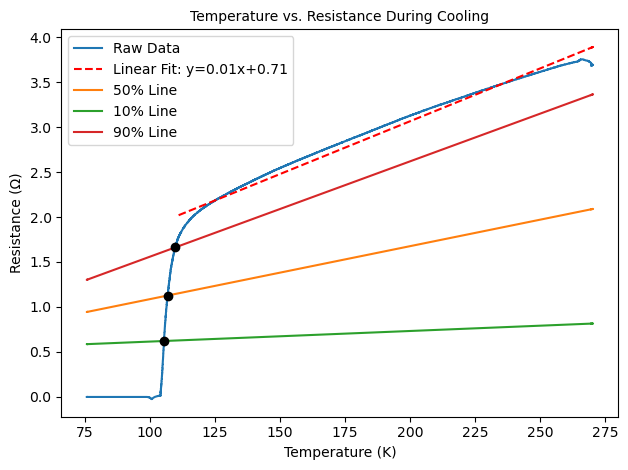

In [21]:
# Example usage:
# Custom formulas: list of (label, formula_function)
custom_lines = [
    ("50% Line", lambda x: 0.5*0.011791*x + 0.496843),
    ("10% Line", lambda x: 0.1*0.011791*x + 0.496843),
    ("90% Line", lambda x: 0.9*0.011791*x + 0.496843)
]

file_name = 'supercond_cool.txt'
title = 'Temperature vs. Resistance During Cooling'
plot_raw_data_with_fit(file_name, title)